In [3]:
pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# EDA Script to find patterns in delays, cancellations, or any contributing factors to delays

### Business Question: How can we enhance operational efficiency by identifying patterns in delays, cancellations, or specific contributing factors?

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
airline_df = pd.read_csv("../dataset/airline.csv")
airline_df.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997


In [29]:
num_cancelled_flights = airline_df[airline_df['Cancelled'] == 1].shape[0]
total_flights = airline_df.shape[0]
proportion_cancelled = round(num_cancelled_flights / total_flights, 5)

In [28]:
print (f"Percentage of cancelled flights: {proportion_cancelled * 100}% from a total of {total_flights} flights")

Percentage of cancelled flights: 1.862% from a total of 9882798 flights


### Separating into cancelled flights and normal flights that were not affected by cancellations

In [19]:
cancelled_flights = airline_df[airline_df['Cancelled'] == 1]
cancelled_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
32,NaN,NaN,NaN,NaN,1325,1325,60.0,NaN,1,NaN,...,2,NaN,DTW,NaN,NaN,NaN,NaN,WN,NaN,1988
51,NaN,NaN,NaN,NaN,2019,1810,69.0,NaN,1,NaN,...,5,NaN,BNA,NaN,N604DL,0.0,0.0,DL,NaN,1998
73,NaN,NaN,NaN,NaN,1748,1544,124.0,C,1,0.0,...,5,0.0,IAH,0.0,0,0.0,0.0,XE,0.0,2006
188,NaN,NaN,NaN,NaN,1622,1510,72.0,NaN,1,NaN,...,6,NaN,LGB,NaN,N901AW,0.0,0.0,HP,NaN,1996


In [20]:
normal_flights = airline_df[airline_df['Cancelled'] == 0]
normal_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997
5,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,NaN,...,2,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989


### Things to take note:
1. ActualElapsedTime - CSRElapsedTime = ArrDelay - DepDelay
2. ArrDelay = CarrierDelay + LateAircraftDelay + NASDelay + SecurityDelay + WeatherDelay

In [30]:
normal_flights.loc[:, 'TotalDelayDuration'] = normal_flights['ArrDelay'] - normal_flights['DepDelay']

total_delay = normal_flights["TotalDelayDuration"]
normal_flights.drop(labels=["TotalDelayDuration"], axis=1, inplace=True)
normal_flights.insert(0, "TotalDelayDuration", total_delay)

/var/folders/cy/45qdmg8x1vz3k7_514vhkl9r0000gn/T/ipykernel_24454/2167108208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_flights.drop(labels=["TotalDelayDuration"], axis=1, inplace=True)


In [31]:
normal_flights.head()

,TotalDelayDuration,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,9.0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,45.0,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
3,10.0,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,-15.0,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997
5,10.0,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,...,2,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989


In [32]:
useful_df = normal_flights.dropna(subset=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"])
useful_df.head()

,TotalDelayDuration,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,9.0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
8,-1.0,293.0,272.0,-1.0,1543.0,1544,750,294.0,NaN,0,...,5,0.0,LAX,0.0,N788UA,8.0,13.0,UA,0.0,2007
13,1.0,121.0,101.0,-6.0,809.0,815,715,120.0,NaN,0,...,3,0.0,HOU,0.0,N725SW,14.0,6.0,WN,0.0,2007
18,6.0,162.0,142.0,5.0,1001.0,956,820,156.0,NaN,0,...,10,0.0,MEM,0.0,N970SW,9.0,11.0,OO,0.0,2006
19,-21.0,113.0,92.0,-25.0,1534.0,1559,1345,134.0,NaN,0,...,8,0.0,ATL,0.0,N17620,11.0,10.0,CO,0.0,2004


In [33]:
useful_df.shape[0]

2690088

In [34]:
print (f"Percentage of flights without delay information: {round((1 - useful_df.shape[0] / normal_flights.shape[0]) * 100, 2)}%")

Percentage of flights without delay information: 72.26%


In [35]:
print (f"Percentage of flights with delay information: {round(useful_df.shape[0] / normal_flights.shape[0] * 100, 2)}%")

Percentage of flights with delay information: 27.74%


### Seeing distribution of delay times for each factor

In [36]:
delay_factors = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

In [37]:
melted_flights = pd.melt(useful_df, id_vars=["ArrDelay"], value_vars=delay_factors, var_name="DelayType", value_name="DelayDuration")

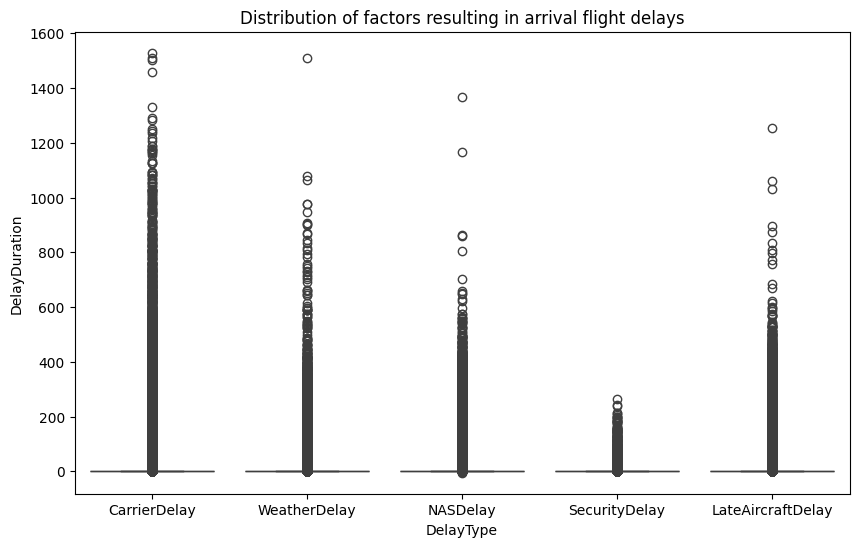

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_flights, x="DelayType", y="DelayDuration")
plt.title("Distribution of factors resulting in arrival flight delays")
plt.show()

In [39]:
useful_df.to_csv("../dataset/flights_with_delay_data.csv", index=False)

In [40]:
normal_flights.to_csv("../dataset/flights_without_cancellation_data.csv", index=False)